In [2]:
##Shared code amongst all made models:

# Importing Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression



# Load the Data (adapt to your needs)
mergeddata_filepath = '../input/merged-data/merged_data.csv'
mergeddata = pd.read_csv(mergeddata_filepath)

# Select Only Proteins Starting From 'O43704'
protein_data = mergeddata.loc[:, 'O43704':]

# Define the Target (Tumor Subtype)
target = mergeddata['Proteomic_Subtype']

# Split the Data into Training and Test Sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(protein_data, target, test_size=0.3, random_state=1)

Random Forest Cross-validation Scores: [0.85714286 0.85714286 0.85714286 1.         0.85714286]
Mean Cross-validation Accuracy: 0.8857142857142856
Accuracy: 0.9032258064516129
Classification Report:
              precision    recall  f1-score   support

         S-I       0.91      0.83      0.87        12
        S-II       0.91      0.91      0.91        11
       S-III       0.89      1.00      0.94         8

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.91        31
weighted avg       0.90      0.90      0.90        31



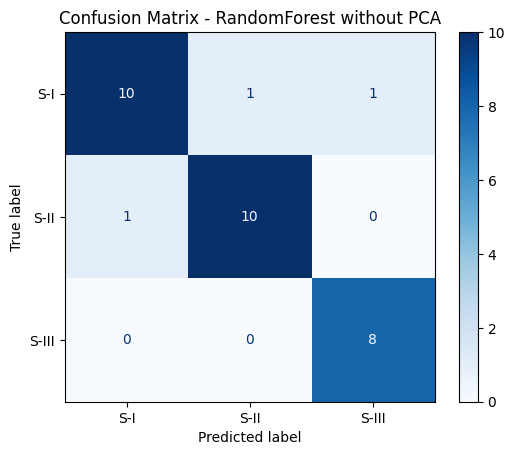

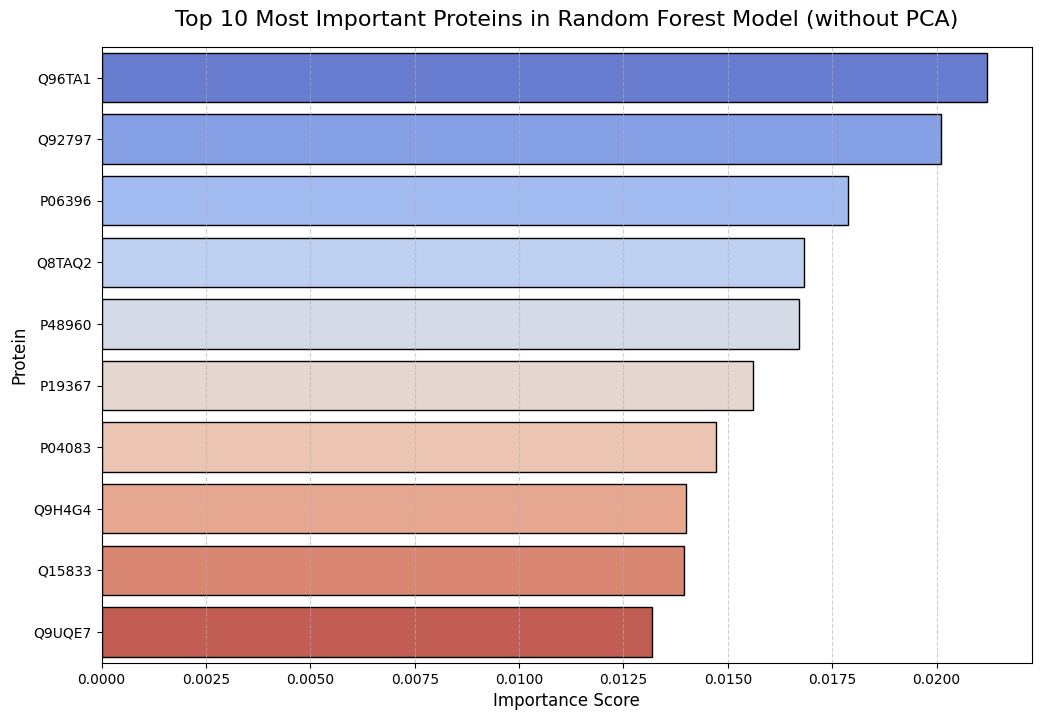

In [3]:
#RANDOMFOREST MODEL 1 (WITHOUT PCA)(Has the highest accuracy)


# Convert Scaled Data to DataFrame with Correct Column Names
X_test = pd.DataFrame(X_test, columns=X_test.columns) 

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

# Cross-Validation of Random Forest (5-Fold Cross-Validation)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean()}")

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the Evaluation Results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

# Plot the Confusion Matrix (Shows how well the model classifies different categories.)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForest without PCA")
plt.show()



##Plotting the Top 10 Most & Least Important proteins that influence the models decisions in a graph:

# Feature Importance (Feature importance = how much every feature determines the decisionmaking of the model)
importances = rf_model.feature_importances_

# Create a DataFrame of Important Proteins
important_proteins = pd.DataFrame({
    'Protein': protein_data.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the Top 10 Most Important Proteins
top_10_proteins = important_proteins.head(10)

# Plot the Top 10 Most Important Proteins
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Protein', 
    data=top_10_proteins, 
    palette='coolwarm', 
    edgecolor='black'
)

# Add labels and a title to the plot
plt.title('Top 10 Most Important Proteins in Random Forest Model (without PCA)', fontsize=16, pad=15)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Protein', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


Random Forest Cross-validation Scores: [0.92857143 1.         0.92857143 0.92857143 0.71428571]
Mean Cross-validation Accuracy: 0.9
Accuracy: 0.8709677419354839
Classification Report:
              precision    recall  f1-score   support

         S-I       0.92      0.92      0.92        12
        S-II       0.90      0.82      0.86        11
       S-III       0.78      0.88      0.82         8

    accuracy                           0.87        31
   macro avg       0.86      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



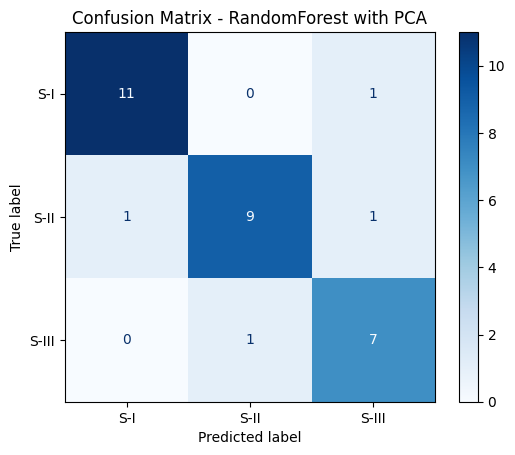

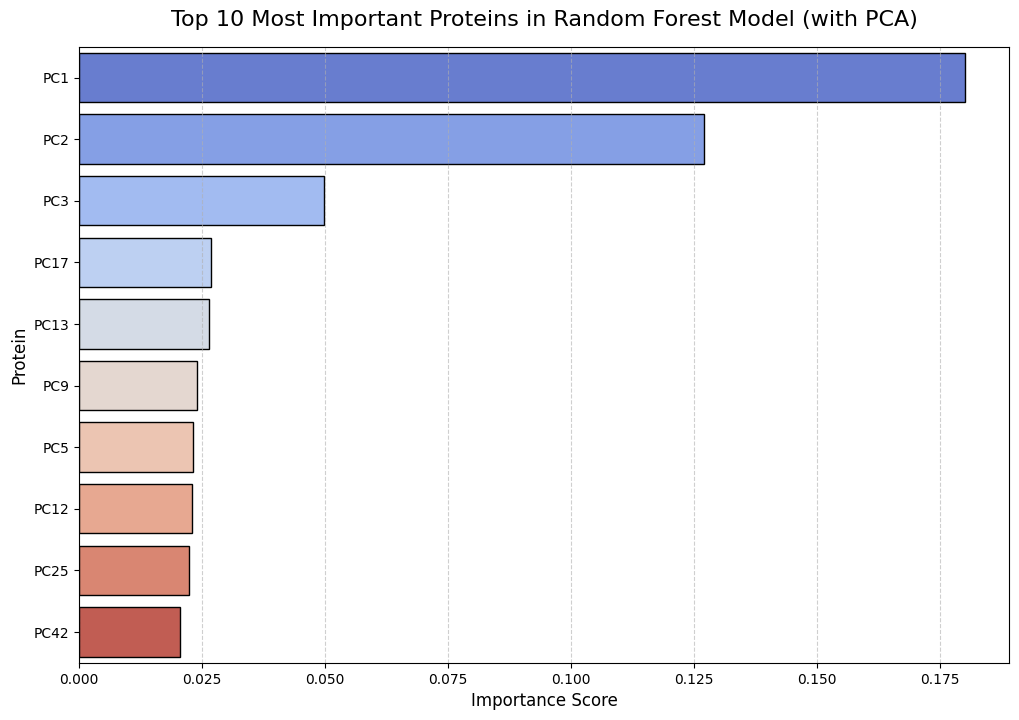

In [4]:
#RANDOMFOREST MODEL 2 (WITH PCA) (Has the lowest accuracy)
 

# Apply PCA for Dimensionality Reduction (Retain 95% Variance)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_pca, y_train)

# Cross-Validation of the Random Forest (5-Fold Cross-Validation)
cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5)
print(f"Random Forest Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean()}")

# Make Predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the Evaluation Results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

# Plot the Confusion Matrix (Shows how well the model classifies different categories.)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForest with PCA")
plt.show()

##Plotting the Top 10 Most & Least Important PC's (Principle Components = generated features after PCA) that influence the models decisions in a graph:

# Feature Importance After PCA (Feature importance = how much every feature determines the decisionmaking of the model)
importances = rf_model.feature_importances_

# Create a DataFrame of Important Proteins (Components)
important_proteins = pd.DataFrame({
    'Protein': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Select the Top 10 Most Important Proteins
top_10_proteins = important_proteins.head(10)

# Plot the Top 10 Most Important Proteins
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Protein', 
    data=top_10_proteins, 
    palette='coolwarm', 
    edgecolor='black'
)

# Add labels and a title to the plot
plt.title('Top 10 Most Important Proteins in Random Forest Model (with PCA)', fontsize=16, pad=15)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Protein', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


Logistic Regression Cross-validation Scores: [0.85714286 0.92857143 0.85714286 0.92857143 1.        ]
Mean Cross-validation Accuracy: 0.91
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

         S-I       0.92      1.00      0.96        12
        S-II       0.91      0.91      0.91        11
       S-III       1.00      0.88      0.93         8

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



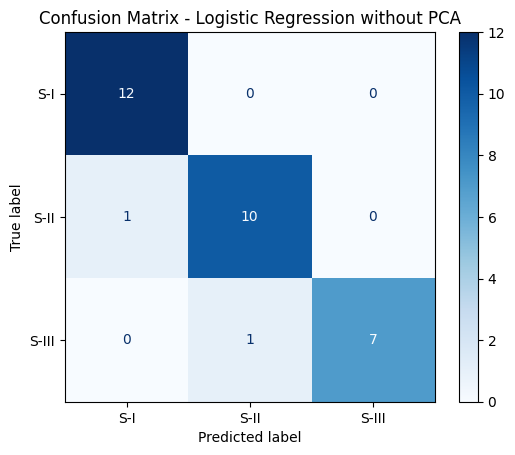

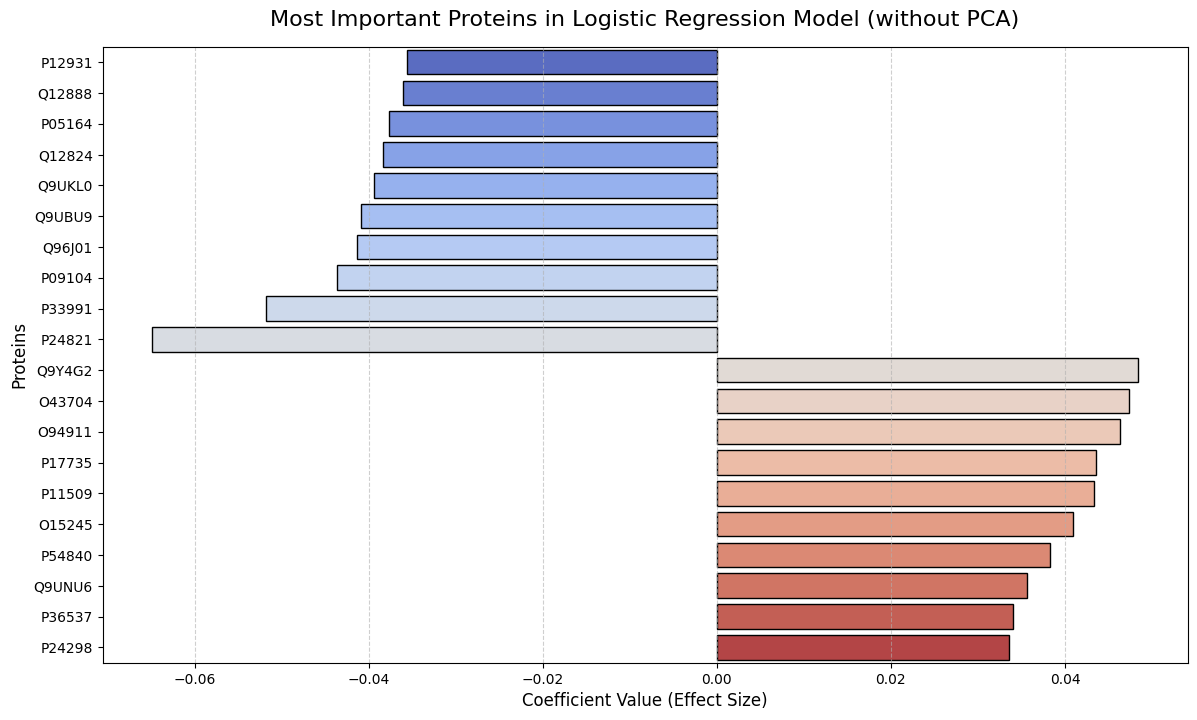

In [7]:
#LogisticRegression Model 1 (Without PCA) (It has the same accuracy as the next model WITH PCA. We're chosing this model, because PCA makes the results harder to interprete due to the new features it calculates.)


# Convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train, columns=protein_data.columns, index=X_train.index)
X_test = pd.DataFrame(X_test, columns=protein_data.columns, index=X_test.index)

# Train a Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=1)

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.2f}")

# Train the model
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")

# Plot the Confusion Matrix (Shows how well the model classifies different categories.)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression without PCA")
plt.show()


##Plotting the Top 10 Most & Least Important proteins that influence the models decisions in a graph:

# View the Coefficients (=feature importance, how much every feature determines the decisionmaking of the model)
Coefficients = pd.DataFrame({
    'Protein': protein_data.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)


# Combine positive and negative coefficients
top_positive = Coefficients.head(10)
top_negative = Coefficients.tail(10)

# Combine data for visualization
top_features = pd.concat([top_negative, top_positive])

# Reset the index of the combined DataFrame
top_features = top_features.reset_index(drop=True)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Coefficient', y='Protein', data=top_features,
    palette='coolwarm', edgecolor='black'
)

# Add labels and title
plt.title('Most Important Proteins in Logistic Regression Model (without PCA)', fontsize=16, pad=15)
plt.xlabel('Coefficient Value (Effect Size)', fontsize=12)
plt.ylabel('Proteins', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

Logistic Regression Cross-validation Scores: [0.85714286 1.         0.85714286 0.85714286 0.92857143]
Mean Cross-validation Accuracy: 0.90
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

         S-I       0.92      1.00      0.96        12
        S-II       0.91      0.91      0.91        11
       S-III       1.00      0.88      0.93         8

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



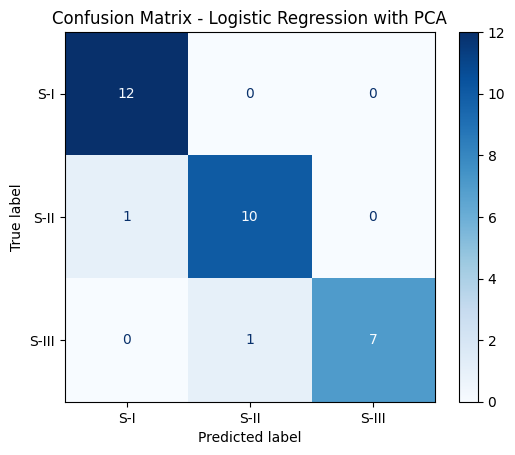

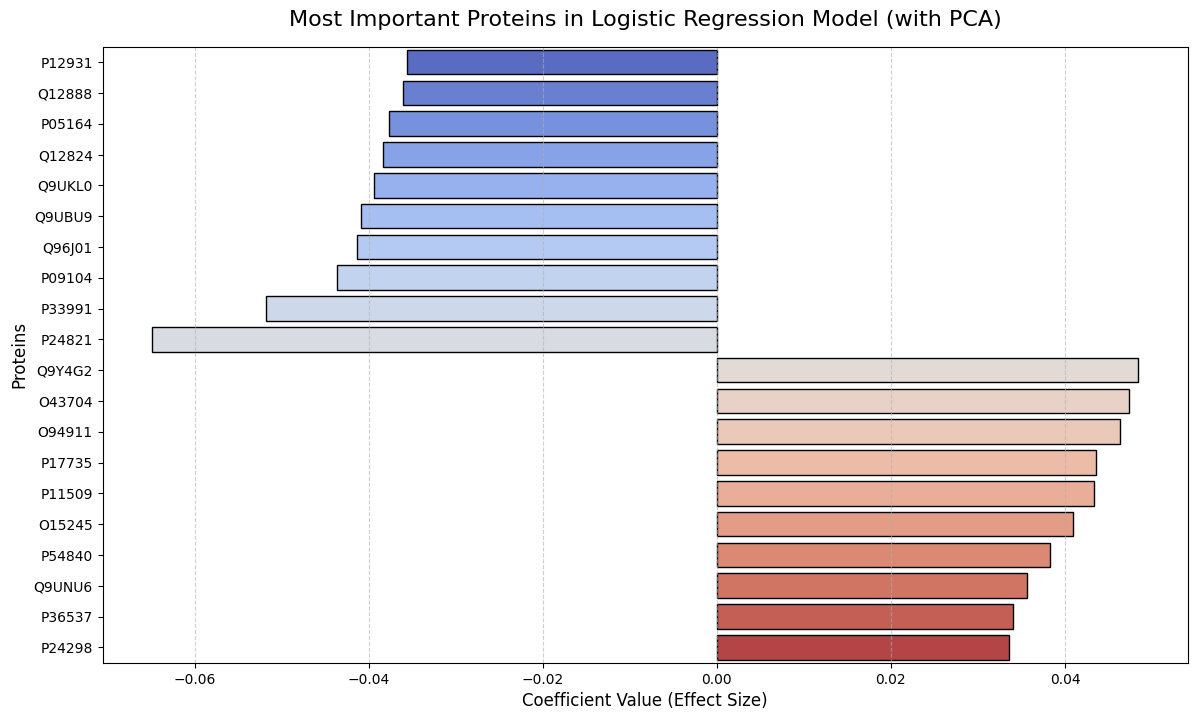

In [8]:
#LogisticRegression Model 2 (With PCA, same accuracy as the model WITHOUT PCA)


# Apply PCA to Reduce Dimensionality (Keeping 95% of Variance)
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=1)

# Perform Cross-Validation to Evaluate the Model's Performance
cv_scores = cross_val_score(log_model, X_train_pca, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.2f}")

# Train the Model
log_model.fit(X_train_pca, y_train)

# Make Predictions
y_pred = log_model.predict(X_test_pca)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the Evaluation Results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_rep}")

# Plot the Confusion Matrix (Shows how well the model classifies different categories.)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.show()

##Plotting the Top 10 Most & Least Important PC's (Principle Components = generated features after PCA) that influence the models decisions in a graph:

# View the Coefficients (=feature importance, how much every feature determines the decisionmaking of the model)
Coefficients = pd.DataFrame({
    'Protein': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],  # Use the components instead of protein names
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Combine positive and negative coefficients
top_positive = Coefficients.head(10)
top_negative = Coefficients.tail(10)

# Combine data for visualization
Coefficients = pd.concat([top_negative, top_positive])

# Reset the index of the combined DataFrame
CoefficientsCoefficients = Coefficients.reset_index(drop=True)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Coefficient', y='Protein', data=top_features,
    palette='coolwarm', edgecolor='black'
)

# Add labels and title
plt.title('Most Important Proteins in Logistic Regression Model (with PCA)', fontsize=16, pad=15)
plt.xlabel('Coefficient Value (Effect Size)', fontsize=12)
plt.ylabel('Proteins', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()